# LazyPredict for Classification

In [2]:
!pip install lazypredict

In [1]:
# Imports
import tensorflow as tf
import os
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
import numpy as np
import lazypredict

## Set random seed for reproducibility

In [2]:
SEED = 64

#torch.backends.cudnn.deterministic = True
#torch.backends.cudnn.benchmark = False
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

## Data Loading

In [3]:
# Only modify this
file_name = "heloc"

In [4]:
df = pd.read_csv(f'../../Data/Binary/{file_name}.csv')
df

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,Good,73,131,5,57,21,0,0,95,80,...,19,7,0,0,26,-8,5,2,0,100
9867,Bad,65,147,39,68,11,0,0,92,28,...,42,1,1,1,86,53,2,2,1,80
9868,Bad,74,129,6,64,18,1,1,100,-7,...,33,3,4,4,6,-8,5,-8,0,56
9869,Bad,72,234,12,113,42,2,2,96,35,...,20,6,0,0,19,-8,4,1,0,38


In [5]:
df.shape

(9871, 24)

In [6]:
# Display the first few rows of the dataframe
print(df.head())

# Display the dataframe's information (column types, non-null values, etc.)
print(df.info())

# Get the number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

  RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0             Bad                    55                    144   
1             Bad                    61                     58   
2             Bad                    67                     66   
3             Bad                    66                    169   
4             Bad                    81                    333   

   MSinceMostRecentTradeOpen  AverageMInFile  NumSatisfactoryTrades  \
0                          4              84                     20   
1                         15              41                      2   
2                          5              24                      9   
3                          1              73                     28   
4                         27             132                     12   

   NumTrades60Ever2DerogPubRec  NumTrades90Ever2DerogPubRec  \
0                            3                            0   
1                            4                    

In [7]:
# Summary statistics for numerical columns
print(df.describe())

# For categorical columns if any
#print(df.describe(include='object'))

       ExternalRiskEstimate  MSinceOldestTradeOpen  MSinceMostRecentTradeOpen  \
count               9871.00                9871.00                    9871.00   
mean                  71.98                 195.71                       9.59   
std                   10.20                 101.94                      12.96   
min                   -9.00                  -8.00                       0.00   
25%                   64.00                 131.00                       3.00   
50%                   72.00                 183.00                       6.00   
75%                   80.00                 255.00                      12.00   
max                   94.00                 803.00                     383.00   

       AverageMInFile  NumSatisfactoryTrades  NumTrades60Ever2DerogPubRec  \
count         9871.00                9871.00                      9871.00   
mean            78.78                  21.12                         0.58   
std             34.07                  

In [8]:
# Check for missing values
print(df.isnull().sum())

RiskPerformance                       0
ExternalRiskEstimate                  0
MSinceOldestTradeOpen                 0
MSinceMostRecentTradeOpen             0
AverageMInFile                        0
NumSatisfactoryTrades                 0
NumTrades60Ever2DerogPubRec           0
NumTrades90Ever2DerogPubRec           0
PercentTradesNeverDelq                0
MSinceMostRecentDelq                  0
MaxDelq2PublicRecLast12M              0
MaxDelqEver                           0
NumTotalTrades                        0
NumTradesOpeninLast12M                0
PercentInstallTrades                  0
MSinceMostRecentInqexcl7days          0
NumInqLast6M                          0
NumInqLast6Mexcl7days                 0
NetFractionRevolvingBurden            0
NetFractionInstallBurden              0
NumRevolvingTradesWBalance            0
NumInstallTradesWBalance              0
NumBank2NatlTradesWHighUtilization    0
PercentTradesWBalance                 0
dtype: int64


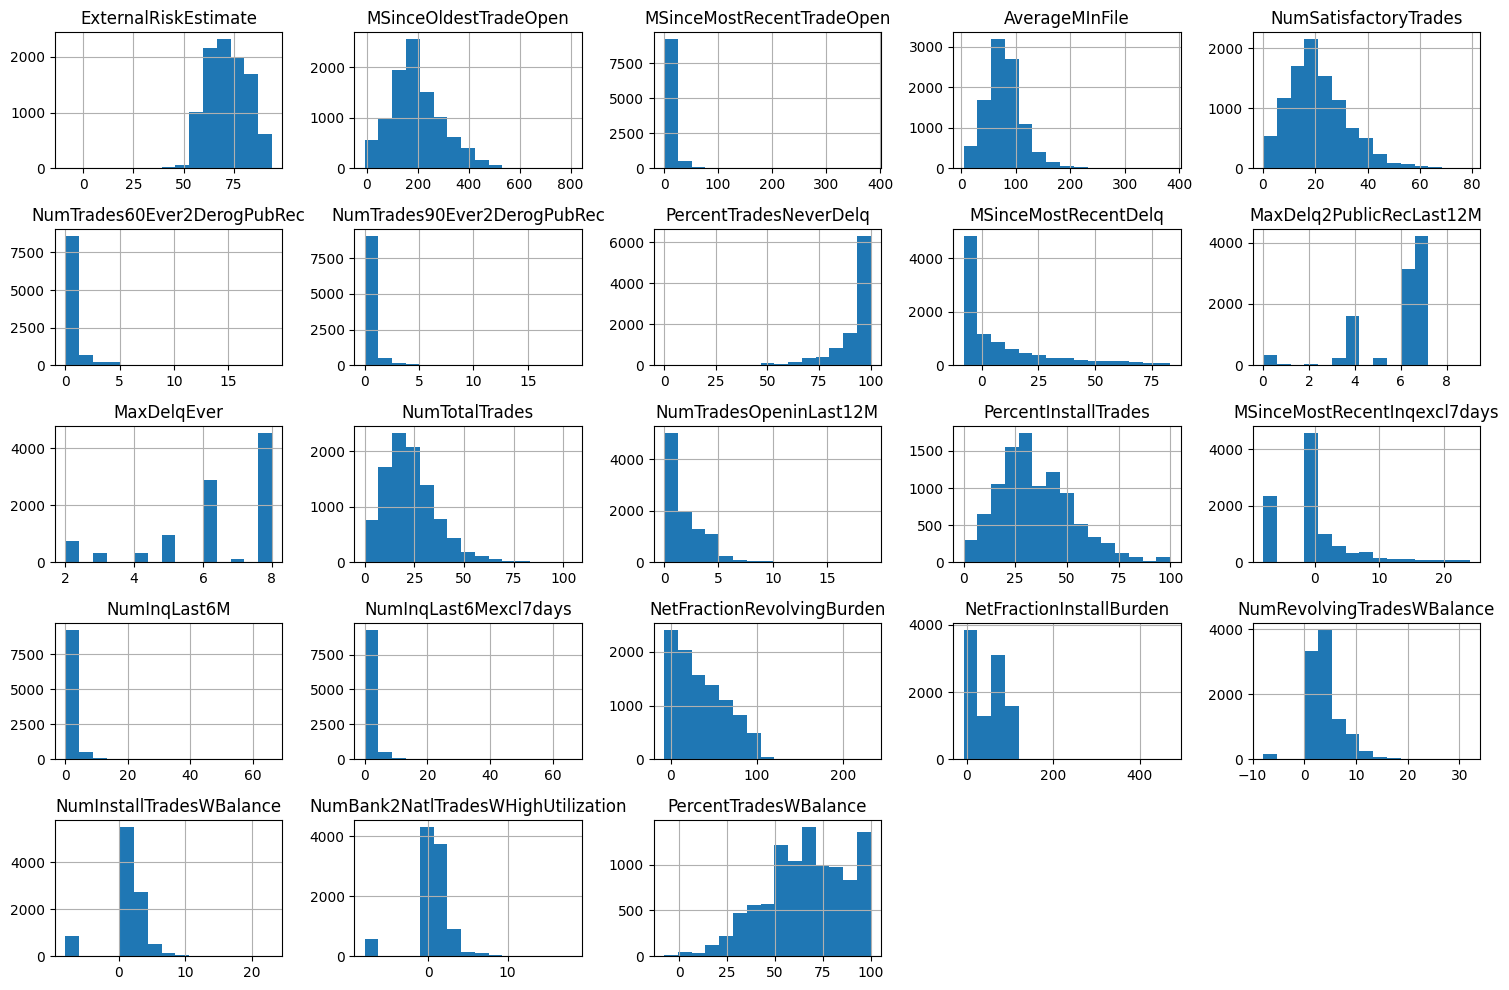

In [9]:
# Histograms for numerical data
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure.
plt.show()

## Data Preprocessing

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['RiskPerformance'] = encoder.fit_transform(df['RiskPerformance'])

In [11]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index([], dtype='object')


In [12]:
# Step 1: Select the first column
first_column = df.iloc[:, 0]
# Step 2: Drop the first column from the dataframe
df = df.iloc[:, 1:]
# Step 3: Append the first column to the end of the dataframe
df[first_column.name] = first_column

In [13]:
df

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,RiskPerformance
0,55,144,4,84,20,3,0,83,2,3,...,0,0,0,33,-8,8,1,1,69,0
1,61,58,15,41,2,4,4,100,-7,0,...,0,0,0,0,-8,0,-8,-8,0,0
2,67,66,5,24,9,0,0,100,-7,7,...,0,4,4,53,66,4,2,1,86,0
3,66,169,1,73,28,1,1,93,76,6,...,0,5,4,72,83,6,4,3,91,0
4,81,333,27,132,12,0,0,100,-7,7,...,0,1,1,51,89,3,1,0,80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,73,131,5,57,21,0,0,95,80,6,...,7,0,0,26,-8,5,2,0,100,1
9867,65,147,39,68,11,0,0,92,28,6,...,1,1,1,86,53,2,2,1,80,0
9868,74,129,6,64,18,1,1,100,-7,6,...,3,4,4,6,-8,5,-8,0,56,0
9869,72,234,12,113,42,2,2,96,35,6,...,6,0,0,19,-8,4,1,0,38,0


In [14]:
df_x = df.iloc[:,:-1].values
df_y = df['RiskPerformance'].values
df_y

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
# Split the dataset into training and validation sets with stratification
X_train, X_val, y_train, y_val = train_test_split(df_x, df_y, test_size=0.20, random_state=SEED, stratify=df_y)

# Further split the validation set into validation and test sets, again using stratification
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.50, random_state=SEED, stratify=y_val)

X_train

array([[ 69, 131,   5, ...,   2,   1,  67],
       [ 82, 212,  22, ...,   2,   0,  75],
       [ 72, 367,   6, ...,   3,   2,  50],
       ...,
       [ 78, 221,   4, ...,   2,   2,  80],
       [ 79, 196,  13, ...,   2,   1,  60],
       [ 79, 231,  12, ...,   1,   1,  50]], dtype=int64)

In [16]:
y_test

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,

## Model Architecture (Lazy Predict)

In [17]:
# All the different classifiers
lazypredict.Supervised.CLASSIFIERS

[('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('CalibratedClassifierCV', sklearn.calibration.CalibratedClassifierCV),
 ('CategoricalNB', sklearn.naive_bayes.CategoricalNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('ExtraTreeClassifier', sklearn.tree._classes.ExtraTreeClassifier),
 ('ExtraTreesClassifier', sklearn.ensemble._forest.ExtraTreesClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('KNeighborsClassifier',
  sklearn.neighbors._classification.KNeighborsClassifier),
 ('LabelPropagation',
  sklearn.semi_supervised._label_propagation.LabelPropagation),
 ('LabelSpreading', sklearn.semi_supervised._label_propagation.LabelSpreading),
 ('LinearDiscriminantAnalysis',
  sklearn.discriminant_analysis.LinearDiscriminantAnalysis),
 ('Linear

In [18]:
#lazypredict.supervised.REGRESSORS = lazypredict.supervised.REGRESSORS[33:36]
#lazypredict.supervised.REGRESSORS

In [19]:
#regressor=['RandomForestRegressor', 'XGBRegressor', 'GradientBoostingRegressor', 'HistGradientBoostingRegressor']
clf = LazyClassifier(verbose=2, ignore_warnings=True, custom_metric=None)

## Model Training

In [20]:
models, predictions = clf.fit(X_train, X_val, y_train, y_val)

  0%|          | 0/29 [00:00<?, ?it/s]

  3%|▎         | 1/29 [00:00<00:10,  2.64it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.7315096251266464, 'Balanced Accuracy': 0.7305817655333536, 'ROC AUC': 0.7305817655333536, 'F1 Score': 0.7313515376047824, 'Time taken': 0.37902116775512695}


 14%|█▍        | 4/29 [00:01<00:07,  3.49it/s]

{'Model': 'BaggingClassifier', 'Accuracy': 0.7112462006079028, 'Balanced Accuracy': 0.7080066797739406, 'ROC AUC': 0.7080066797739407, 'F1 Score': 0.709180102885827, 'Time taken': 0.8232316970825195}
{'Model': 'BernoulliNB', 'Accuracy': 0.707193515704154, 'Balanced Accuracy': 0.7066452233857898, 'ROC AUC': 0.7066452233857898, 'F1 Score': 0.7071808688416427, 'Time taken': 0.0200955867767334}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.7173252279635258, 'Balanced Accuracy': 0.7156982913927987, 'ROC AUC': 0.7156982913927987, 'F1 Score': 0.7167899347265343, 'Time taken': 0.12934207916259766}


 21%|██        | 6/29 [00:01<00:04,  5.56it/s]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.6443768996960486, 'Balanced Accuracy': 0.6428768272719046, 'ROC AUC': 0.6428768272719048, 'F1 Score': 0.6438997180542321, 'Time taken': 0.11267638206481934}
{'Model': 'DummyClassifier', 'Accuracy': 0.5207700101317123, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.356663271429314, 'Time taken': 0.013995170593261719}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.5927051671732523, 'Balanced Accuracy': 0.592760013491169, 'ROC AUC': 0.592760013491169, 'F1 Score': 0.5928783523965281, 'Time taken': 0.020944595336914062}


 31%|███       | 9/29 [00:02<00:05,  3.60it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.7142857142857143, 'Balanced Accuracy': 0.712358404422471, 'ROC AUC': 0.712358404422471, 'F1 Score': 0.7135334805941406, 'Time taken': 1.0881681442260742}
{'Model': 'GaussianNB', 'Accuracy': 0.6980749746707193, 'Balanced Accuracy': 0.7010101924136853, 'ROC AUC': 0.7010101924136852, 'F1 Score': 0.697031186022266, 'Time taken': 0.017998218536376953}


 38%|███▊      | 11/29 [00:02<00:04,  4.29it/s]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.6828774062816616, 'Balanced Accuracy': 0.6832146000773274, 'ROC AUC': 0.6832146000773275, 'F1 Score': 0.6830141856301126, 'Time taken': 0.2602558135986328}


 41%|████▏     | 12/29 [00:05<00:10,  1.65it/s]

{'Model': 'LabelPropagation', 'Accuracy': 0.6149949341438703, 'Balanced Accuracy': 0.6157628680251067, 'ROC AUC': 0.6157628680251067, 'F1 Score': 0.6150889997678938, 'Time taken': 2.2175450325012207}


 45%|████▍     | 13/29 [00:08<00:17,  1.12s/it]

{'Model': 'LabelSpreading', 'Accuracy': 0.6149949341438703, 'Balanced Accuracy': 0.6157628680251067, 'ROC AUC': 0.6157628680251067, 'F1 Score': 0.6150889997678938, 'Time taken': 3.0261690616607666}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.7193515704154002, 'Balanced Accuracy': 0.7181497355237288, 'ROC AUC': 0.7181497355237288, 'F1 Score': 0.7190665292881188, 'Time taken': 0.030909299850463867}


 52%|█████▏    | 15/29 [00:08<00:10,  1.28it/s]

{'Model': 'LinearSVC', 'Accuracy': 0.7183383991894631, 'Balanced Accuracy': 0.7169240134582637, 'ROC AUC': 0.7169240134582637, 'F1 Score': 0.7179360254740194, 'Time taken': 0.40244293212890625}
{'Model': 'LogisticRegression', 'Accuracy': 0.7203647416413373, 'Balanced Accuracy': 0.7188695387500925, 'ROC AUC': 0.7188695387500925, 'F1 Score': 0.7199149929929209, 'Time taken': 0.05098867416381836}
{'Model': 'NearestCentroid', 'Accuracy': 0.7102330293819655, 'Balanced Accuracy': 0.7100694301626345, 'ROC AUC': 0.7100694301626344, 'F1 Score': 0.7103116441723664, 'Time taken': 0.02499842643737793}


 62%|██████▏   | 18/29 [00:11<00:09,  1.20it/s]

{'Model': 'NuSVC', 'Accuracy': 0.7051671732522796, 'Balanced Accuracy': 0.7053742565460962, 'ROC AUC': 0.7053742565460962, 'F1 Score': 0.7052907277491927, 'Time taken': 2.636519193649292}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.6048632218844985, 'Balanced Accuracy': 0.6065411604050641, 'ROC AUC': 0.6065411604050641, 'F1 Score': 0.604522427245775, 'Time taken': 0.02608466148376465}
{'Model': 'Perceptron', 'Accuracy': 0.5997973657548126, 'Balanced Accuracy': 0.597798636075715, 'ROC AUC': 0.597798636075715, 'F1 Score': 0.5988755225068414, 'Time taken': 0.020996570587158203}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.6798378926038501, 'Balanced Accuracy': 0.6842593430458781, 'ROC AUC': 0.6842593430458781, 'F1 Score': 0.6768334795370469, 'Time taken': 0.03444385528564453}


 86%|████████▌ | 25/29 [00:13<00:01,  2.10it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.7254305977710233, 'Balanced Accuracy': 0.7237333519796645, 'ROC AUC': 0.7237333519796645, 'F1 Score': 0.7248555500943465, 'Time taken': 2.0183212757110596}
{'Model': 'RidgeClassifier', 'Accuracy': 0.7193515704154002, 'Balanced Accuracy': 0.7181497355237288, 'ROC AUC': 0.7181497355237288, 'F1 Score': 0.7190665292881188, 'Time taken': 0.023998737335205078}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.7193515704154002, 'Balanced Accuracy': 0.7181497355237288, 'ROC AUC': 0.7181497355237288, 'F1 Score': 0.7190665292881188, 'Time taken': 0.03300023078918457}
{'Model': 'SGDClassifier', 'Accuracy': 0.6869300911854104, 'Balanced Accuracy': 0.6880331685326708, 'ROC AUC': 0.6880331685326708, 'F1 Score': 0.6869551582458031, 'Time taken': 0.04656362533569336}


 97%|█████████▋| 28/29 [00:15<00:00,  1.98it/s]

{'Model': 'SVC', 'Accuracy': 0.7284701114488349, 'Balanced Accuracy': 0.7272418785630259, 'ROC AUC': 0.7272418785630259, 'F1 Score': 0.7281730389171446, 'Time taken': 1.6766202449798584}
{'Model': 'XGBClassifier', 'Accuracy': 0.7021276595744681, 'Balanced Accuracy': 0.7013598111236334, 'ROC AUC': 0.7013598111236334, 'F1 Score': 0.7020412362648669, 'Time taken': 0.16941380500793457}
[LightGBM] [Info] Number of positive: 3788, number of negative: 4108


100%|██████████| 29/29 [00:15<00:00,  1.88it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1488
[LightGBM] [Info] Number of data points in the train set: 7896, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.479737 -> initscore=-0.081098
[LightGBM] [Info] Start training from score -0.081098
{'Model': 'LGBMClassifier', 'Accuracy': 0.7244174265450861, 'Balanced Accuracy': 0.7234351477858854, 'ROC AUC': 0.7234351477858854, 'F1 Score': 0.7242369882763523, 'Time taken': 0.12481498718261719}


In [21]:
models


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.73,0.73,0.73,0.73,0.38
SVC,0.73,0.73,0.73,0.73,1.68
RandomForestClassifier,0.73,0.72,0.72,0.72,2.02
LGBMClassifier,0.72,0.72,0.72,0.72,0.12
LogisticRegression,0.72,0.72,0.72,0.72,0.05
LinearDiscriminantAnalysis,0.72,0.72,0.72,0.72,0.03
RidgeClassifierCV,0.72,0.72,0.72,0.72,0.03
RidgeClassifier,0.72,0.72,0.72,0.72,0.02
LinearSVC,0.72,0.72,0.72,0.72,0.40


## Results

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Extract models from the LazyClassifier
fitted_models = clf.models

# Dictionary to store test performance metrics
test_results = {}

# Loop through the models and evaluate them on the test set
for model_name, model in fitted_models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store the results in the dictionary
    test_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Convert to a DataFrame for easier viewing
test_results_df = pd.DataFrame(test_results).T
test_results_df.sort_values(by='Accuracy', ascending=False, inplace=True)

# Display the test results
print(test_results_df)


                               Accuracy  Precision  Recall  F1 Score
SVC                                0.74       0.74    0.74      0.74
RandomForestClassifier             0.74       0.74    0.74      0.74
RidgeClassifierCV                  0.73       0.73    0.73      0.73
ExtraTreesClassifier               0.73       0.73    0.73      0.73
LinearDiscriminantAnalysis         0.73       0.73    0.73      0.73
RidgeClassifier                    0.73       0.73    0.73      0.73
LogisticRegression                 0.73       0.73    0.73      0.73
CalibratedClassifierCV             0.73       0.73    0.73      0.73
LinearSVC                          0.73       0.73    0.73      0.73
AdaBoostClassifier                 0.72       0.72    0.72      0.72
BernoulliNB                        0.72       0.72    0.72      0.72
LGBMClassifier                     0.72       0.72    0.72      0.72
NearestCentroid                    0.72       0.72    0.72      0.72
NuSVC                             